In [1]:
import importlib
import backtest_manager
import strategy.dollar_cost_averaging
importlib.reload(backtest_manager)
importlib.reload(strategy.dollar_cost_averaging)

<module 'strategy.dollar_cost_averaging' from '/opt/ccclub/backtest/strategy/dollar_cost_averaging.py'>

[*********************100%%**********************]  1 of 1 completed


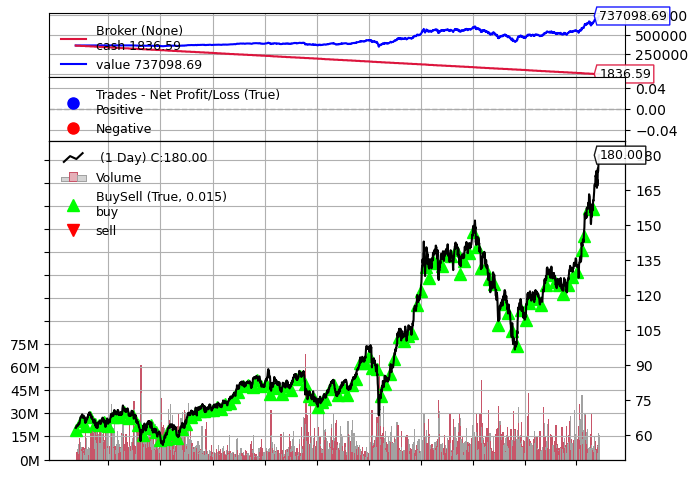

In [4]:
from backtest_manager import BacktestManager

backtest = BacktestManager()

# custom your invest
# stock_ids = ["0050.TW","0056.TW","00631L.TW"]
# buys = [3000, 6000, 6000]
stock_ids = ["0050.TW"]
buy_amounts = [3000]
buy_date = 5
backtest.load_data_yahoo(stock_ids=stock_ids, duration_year=10)
info = backtest.buy_period(buy_amounts, buy_date)
log = backtest.run()
analysis = backtest.analysis()
%matplotlib inline
backtest.plot()

In [1]:
# 讀取資料庫內容, 準備放到後端
import json

# JSON 字符串
json_string = '[{"name":"Alice","age":25,"city":"New York"},{"name":"Bob","age":30,"city":"Los Angeles"}]'

# 将 JSON 字符串转换为 Python 列表
json_list = json.loads(json_string)

print(json_list)
print(type(json_list))  # 输出：<class 'list'>


[{'name': 'Alice', 'age': 25, 'city': 'New York'}, {'name': 'Bob', 'age': 30, 'city': 'Los Angeles'}]
<class 'list'>


In [2]:
# 访问列表中的第一个字典对象
first_dict = json_list[0]

print(first_dict)
print(type(first_dict))  # 输出：<class 'dict'>

# 访问字典对象中的键和值
print(first_dict['name'])  # 输出：Alice
print(first_dict['age'])   # 输出：25
print(first_dict['city'])  # 输出：New York


{'name': 'Alice', 'age': 25, 'city': 'New York'}
<class 'dict'>
Alice
25
New York


In [ ]:
from data import api_table_data


# table_name = ""